In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

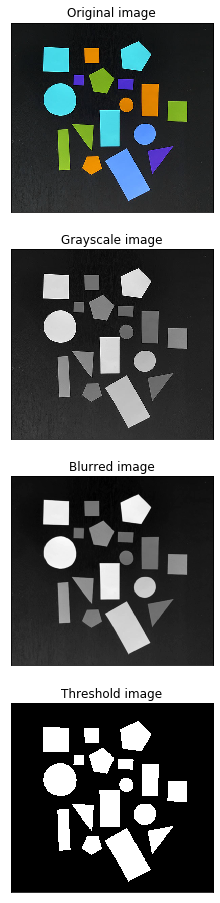

In [2]:
img = cv2.imread('shapes.jpg')

# Conversion to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blurring the image
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Binarization of the image
thresh = cv2.threshold(blur, 62, 255, cv2.THRESH_BINARY)[1]


# Print the results
plt.figure(figsize=(18,16))
plt.subplot(4,1,1)
plt.imshow(img, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Original image')

plt.subplot(4,1,2)
plt.imshow(gray, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Grayscale image')

plt.subplot(4,1,3)
plt.imshow(blur, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Blurred image')

plt.subplot(4,1,4)
plt.imshow(thresh, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Threshold image')

plt.show()

In [3]:
# Find the location of these regions in the image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    # draw the contour and center of the shape on the image
    cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
    cv2.circle(img, (cX, cY), 7, (0, 255,0), -1)
    cv2.putText(img, "center", (cX - 20, cY - 20),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
   
    # show the image
    cv2.imshow("Image", img)
    cv2.waitKey(0)

#### Finding Shapes in Images

Goal: Detect the black shapes in the image

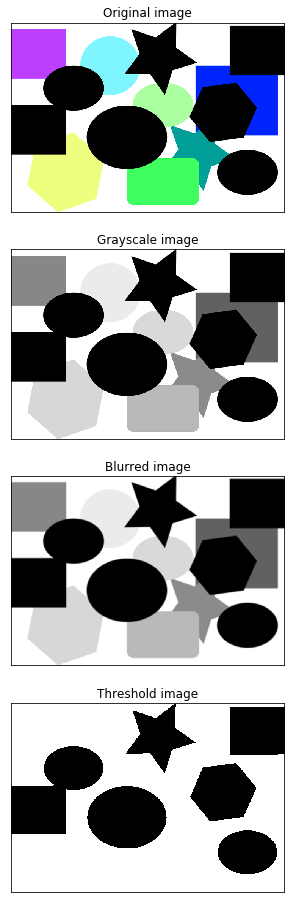

In [4]:
image = cv2.imread('shapes1.png')

# Conversion to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blurring the image
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Binarization of the image
thresh = cv2.threshold(blur, 15, 255, cv2.THRESH_BINARY)[1]


# Print the results
plt.figure(figsize=(18,16))
plt.subplot(4,1,1)
plt.imshow(image, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Original image')

plt.subplot(4,1,2)
plt.imshow(gray, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Grayscale image')

plt.subplot(4,1,3)
plt.imshow(blur, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Blurred image')

plt.subplot(4,1,4)
plt.imshow(thresh, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Threshold image')

plt.show()

In [5]:
# Alternatively we follow the next steps to find the black shapes in the image
lower = np.array([0,0,0])
upper = np.array([15,15,15])
shapeMask = cv2.inRange(image, lower, upper)
cv2.imshow('Shape', shapeMask)
cv2.waitKey(0)

-1

In [6]:
# Find the contours in the mask
cnts = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL, 
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

print('There are {} black shapes in the image.'.format(len(cnts)))

# Loop over the contours
for c in cnts:
    cv2.drawContours(image, [c], -1, (0,255,0), 2)
    cv2.imshow('Image', image)
    cv2.waitKey(0)

There are 6 black shapes in the image.


#### Finding extreme points in contours

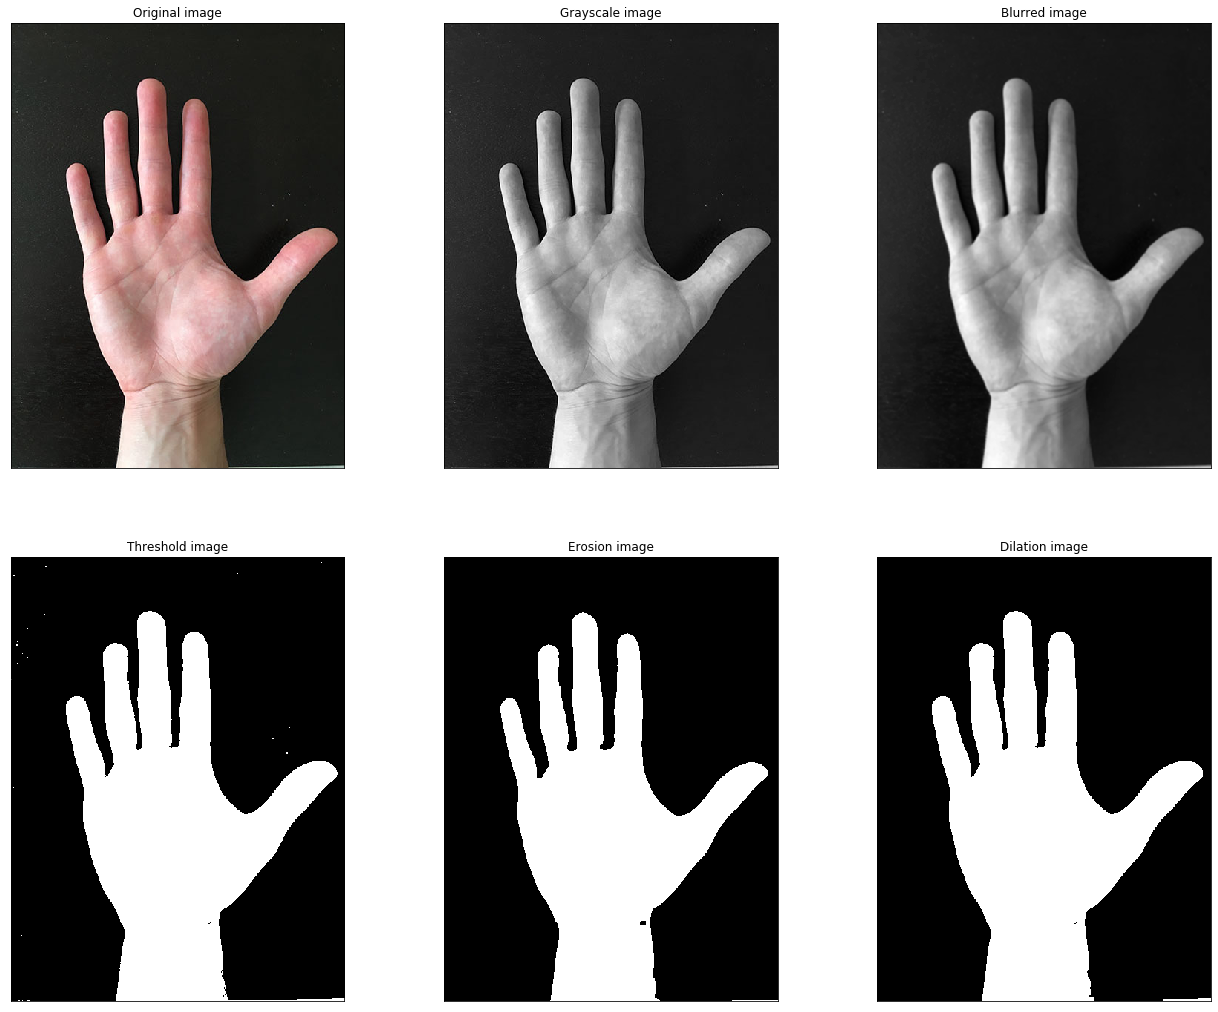

In [7]:
# load the image, convert it to grayscale, and blur it slightly
img = cv2.imread('hand.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 65, 255, cv2.THRESH_BINARY)[1]
erosion = cv2.erode(thresh, None, iterations = 2)
dilation = cv2.dilate(erosion, None, iterations = 2)

# Find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key = cv2.contourArea)

# Print the results
plt.figure(figsize=(22,18))
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Original image')

plt.subplot(2,3,2)
plt.imshow(gray, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Grayscale image')

plt.subplot(2,3,3)
plt.imshow(blur, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Blurred image')

plt.subplot(2,3,4)
plt.imshow(thresh, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Threshold image')

plt.subplot(2,3,5)
plt.imshow(erosion, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Erosion image')

plt.subplot(2,3,6)
plt.imshow(dilation, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Dilation image')

plt.show()

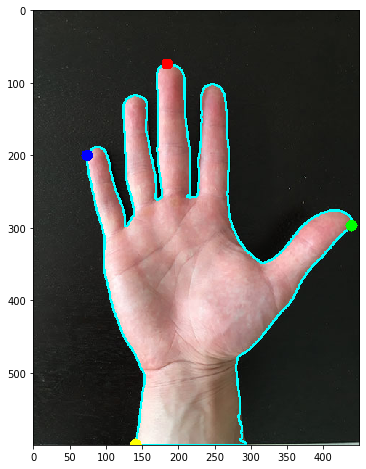

In [8]:
# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(img, [c], -1, (0, 255, 255), 2)
cv2.circle(img, extLeft, 8, (0, 0, 255), -1)
cv2.circle(img, extRight, 8, (0, 255, 0), -1)
cv2.circle(img, extTop, 8, (255, 0, 0), -1)
cv2.circle(img, extBot, 8, (255, 255, 0), -1)
# show the output image
plt.figure(figsize=(14,8))
plt.imshow(img)
plt.show()